In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

In [ ]:
X = np.array([10, 21, 32, 43, 54, 125, 76, 77, 80, 92])
y = np.array([10, 11,12, 13, 14, 15, 16, 17, 18,19])

In [ ]:
loocv = LeaveOneOut()

In [ ]:
loocv.split(X, y)

<generator object BaseCrossValidator.split at 0x7caf3d425a10>

In [ ]:
for element in loocv.split(X, y):
    print(element)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0]))
(array([0, 2, 3, 4, 5, 6, 7, 8, 9]), array([1]))
(array([0, 1, 3, 4, 5, 6, 7, 8, 9]), array([2]))
(array([0, 1, 2, 4, 5, 6, 7, 8, 9]), array([3]))
(array([0, 1, 2, 3, 5, 6, 7, 8, 9]), array([4]))
(array([0, 1, 2, 3, 4, 6, 7, 8, 9]), array([5]))
(array([0, 1, 2, 3, 4, 5, 7, 8, 9]), array([6]))
(array([0, 1, 2, 3, 4, 5, 6, 8, 9]), array([7]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 9]), array([8]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([9]))


In [ ]:
for train_idxs, test_idx in loocv.split(X, y):
    print(X[train_idxs], X[test_idx])

[ 21  32  43  54 125  76  77  80  92] [10]
[ 10  32  43  54 125  76  77  80  92] [21]
[ 10  21  43  54 125  76  77  80  92] [32]
[ 10  21  32  54 125  76  77  80  92] [43]
[ 10  21  32  43 125  76  77  80  92] [54]
[10 21 32 43 54 76 77 80 92] [125]
[ 10  21  32  43  54 125  77  80  92] [76]
[ 10  21  32  43  54 125  76  80  92] [77]
[ 10  21  32  43  54 125  76  77  92] [80]
[ 10  21  32  43  54 125  76  77  80] [92]


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
for i, (train_idxs, test_idxs) in enumerate(kf.split(X, y)):
    print(f'Fold :{i}')
    print(f"Train idxs: {train_idxs}, Test idxs: {test_idxs}")

Fold :0
Train idxs: [2 3 4 5 6 7 8 9], Test idxs: [0 1]
Fold :1
Train idxs: [0 1 4 5 6 7 8 9], Test idxs: [2 3]
Fold :2
Train idxs: [0 1 2 3 6 7 8 9], Test idxs: [4 5]
Fold :3
Train idxs: [0 1 2 3 4 5 8 9], Test idxs: [6 7]
Fold :4
Train idxs: [0 1 2 3 4 5 6 7], Test idxs: [8 9]


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
X = np.random.randint(0, 1000, 100)
y = np.array([0]*15 + [1]*35 + [2]*50)

In [ ]:
X

array([656, 706, 387, 857, 895, 860, 354, 373,  44, 365, 769, 513, 486,
       560, 450, 474, 302, 494, 935, 678, 783, 878, 562, 657, 986, 313,
       398,  33, 398, 934, 213, 939, 339, 875, 767, 739, 334, 781, 242,
       995,  53, 470, 976, 128, 540, 164, 730, 140, 750, 906, 225, 533,
       406, 890, 452, 302, 638, 817,  59, 499, 979, 744, 588, 640, 968,
        77, 899, 756, 911, 955, 829, 782, 694, 945, 295, 823, 362, 373,
       754,   0, 165,  17, 455, 207, 428,  51, 262, 602, 608, 697, 922,
       529, 988, 278, 992, 828, 951, 754, 498, 884])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from collections import Counter
count = Counter(y)

In [ ]:
count

Counter({0: 15, 1: 35, 2: 50})

In [ ]:
# Proportion is 3:7:10

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:
for idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"Fold: {idx}")
    # print(f"train_idx: {train_idx}, test_idx: {test_idx}")
    print(f"Proportion of test split window: {Counter(y[test_idx])}")

Fold: 0
Proportion of test split window: Counter({2: 10, 1: 7, 0: 3})
Fold: 1
Proportion of test split window: Counter({2: 10, 1: 7, 0: 3})
Fold: 2
Proportion of test split window: Counter({2: 10, 1: 7, 0: 3})
Fold: 3
Proportion of test split window: Counter({2: 10, 1: 7, 0: 3})
Fold: 4
Proportion of test split window: Counter({2: 10, 1: 7, 0: 3})


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_scores = list()

In [ ]:
for idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_idx].reshape(-1, 1), X[test_idx].reshape(-1, 1)
    y_train, y_test = y[train_idx], y[test_idx]

    svc = SVC(kernel='linear')

    svc.fit(X_train, y_train)

    y_pred = svc.predict(X_test)

    ac = accuracy_score(y_pred, y_test)

    accuracy_scores.append(ac)

    print(f"Fold: {idx}, accuracy: {ac}")


Fold: 0, accuracy: 0.5
Fold: 1, accuracy: 0.5
Fold: 2, accuracy: 0.5
Fold: 3, accuracy: 0.5
Fold: 4, accuracy: 0.5


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()

In [ ]:
X = iris['data']
y = iris['target']

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
import sklearn.tree

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

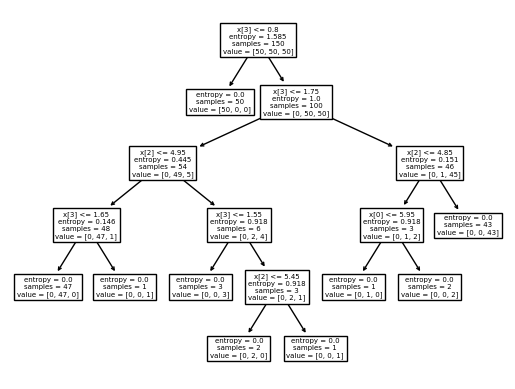

In [ ]:
sklearn.tree.plot_tree(dt)

In [ ]:
import graphviz

In [ ]:
ddata = sklearn.tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(ddata)
graph.render('iris')

'iris.pdf'

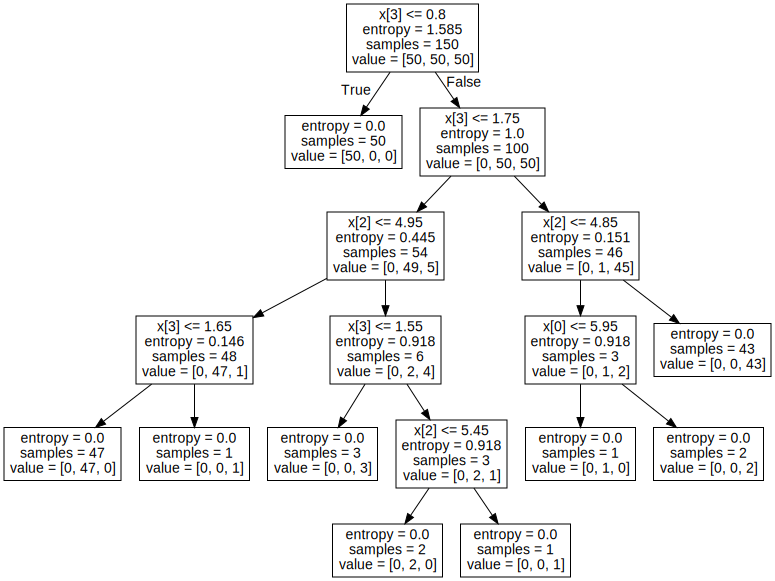

In [ ]:
graph

In [ ]:
ddata = sklearn.tree.export_graphviz(dt, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)

In [ ]:
graph = graphviz.Source(ddata)

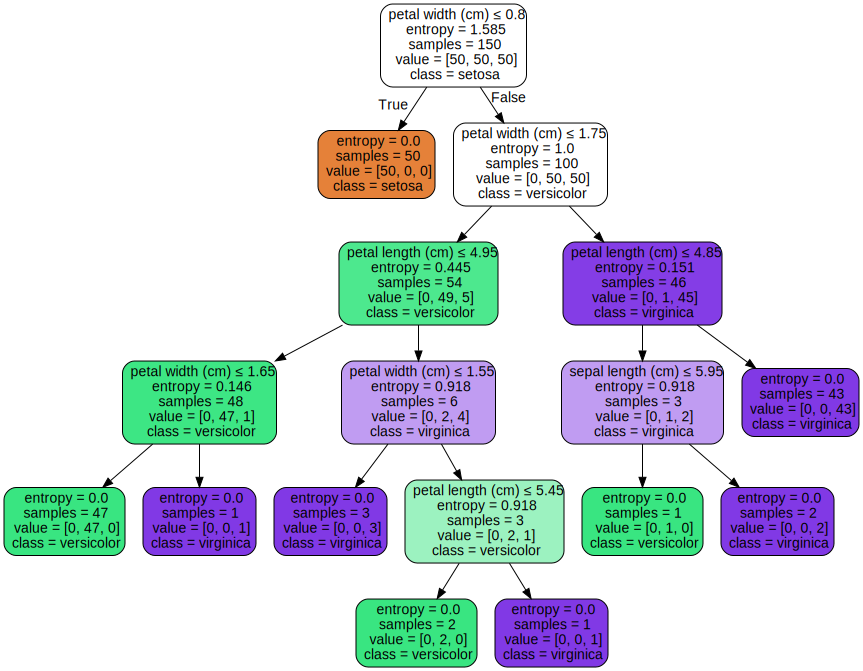

In [ ]:
graph

In [ ]:
# (petal width 0.81, petal length 0.34, sepal length 0.5, sepal width 0.3)  ->>>> class setosa

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols]
y = df['Outcome']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
for i in X_train, X_test, y_train, y_test:
    print(len(i))

614
154
614
154


In [7]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred = dt.predict(X_test)

In [10]:
accuracy_score(y_pred, y_test)

0.7012987012987013

In [13]:
from sklearn.tree import export_graphviz
ddata = export_graphviz(dt, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

In [14]:
import graphviz
graph = graphviz.Source(ddata)

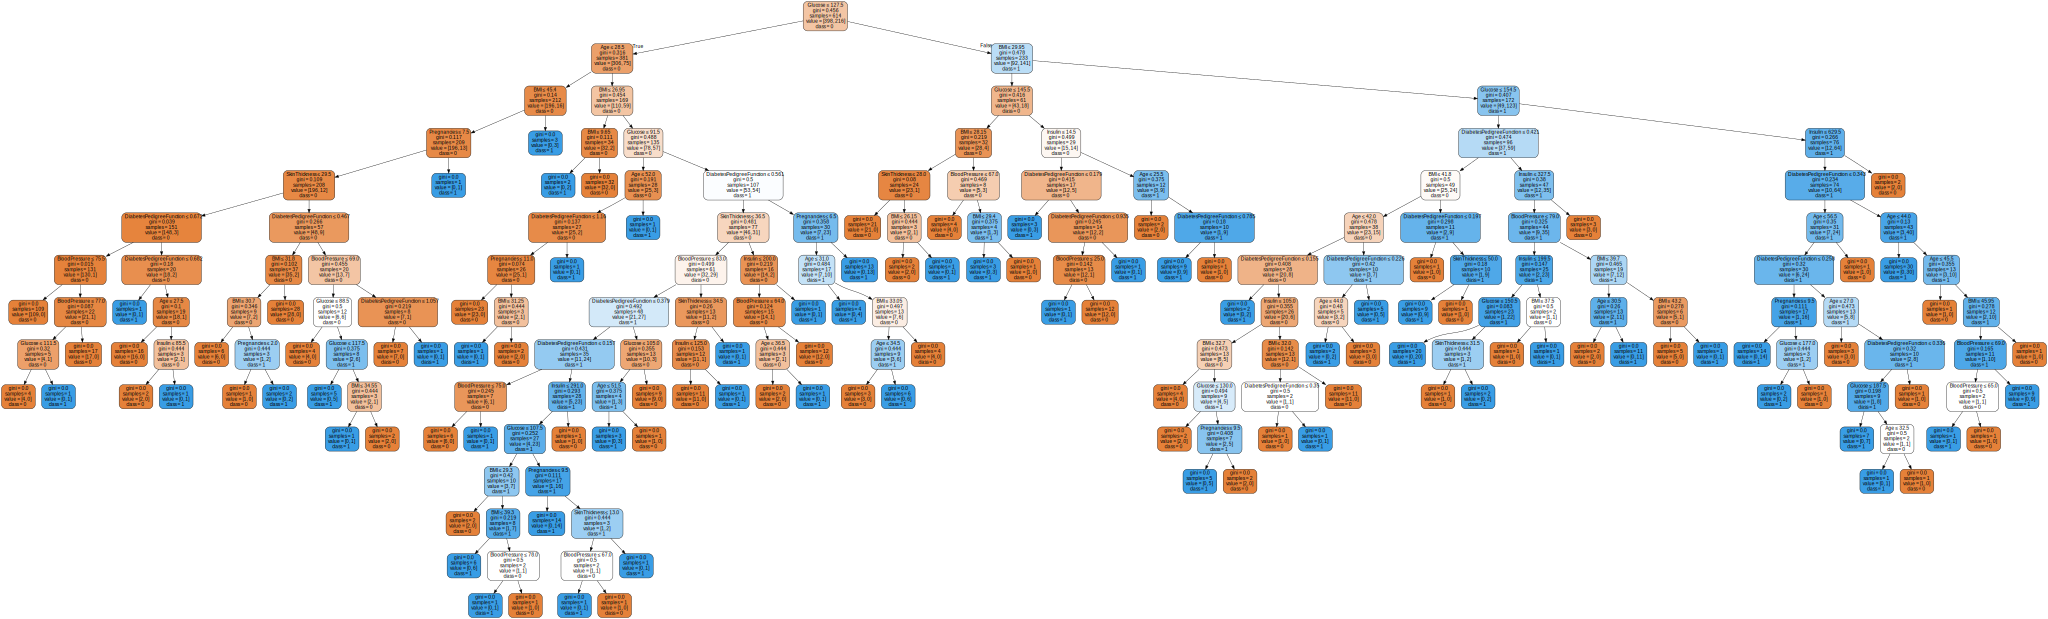

In [15]:
graph

In [24]:
import pydotplus
from six import StringIO
from IPython.display import Image

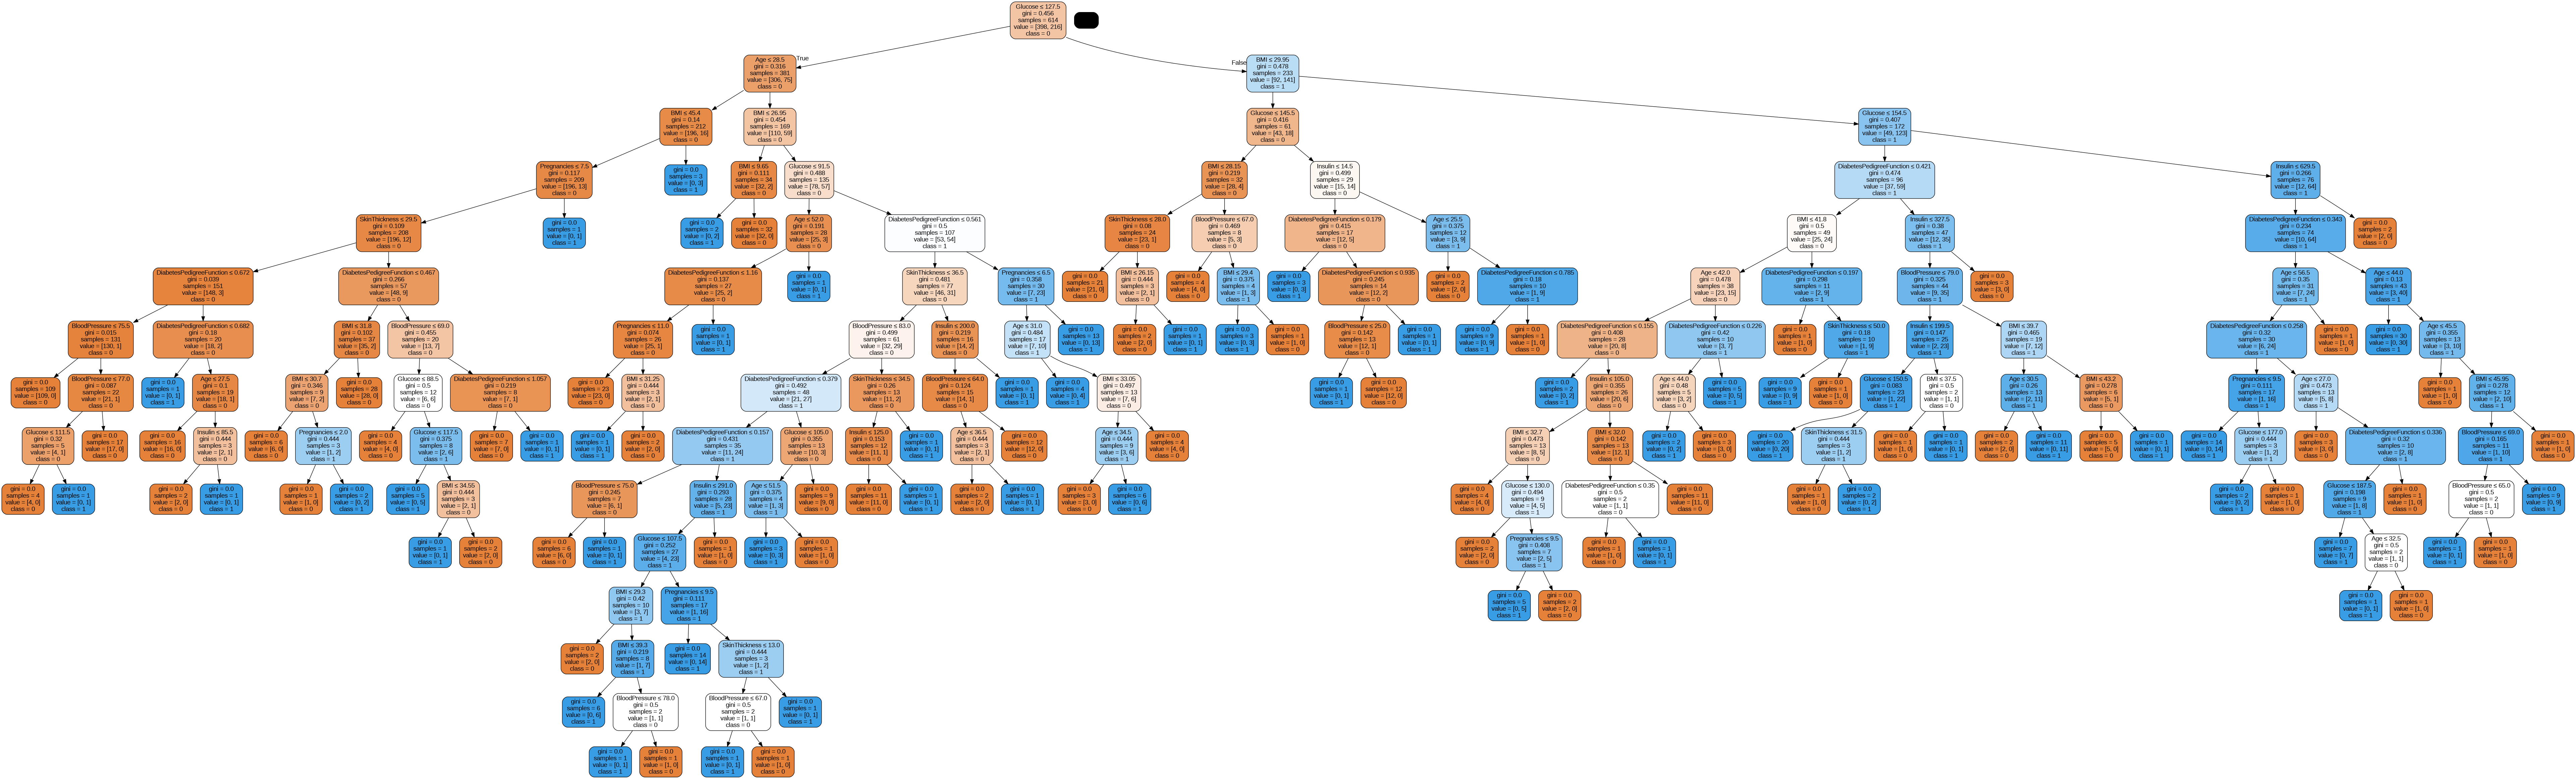

In [26]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [27]:
dto = DecisionTreeClassifier(max_depth=4)

dto.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [28]:
y_pred = dto.predict(X_test)

In [29]:
accuracy_score(y_pred, y_test)

0.7272727272727273

In [34]:
ddata = export_graphviz(dto, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(ddata)

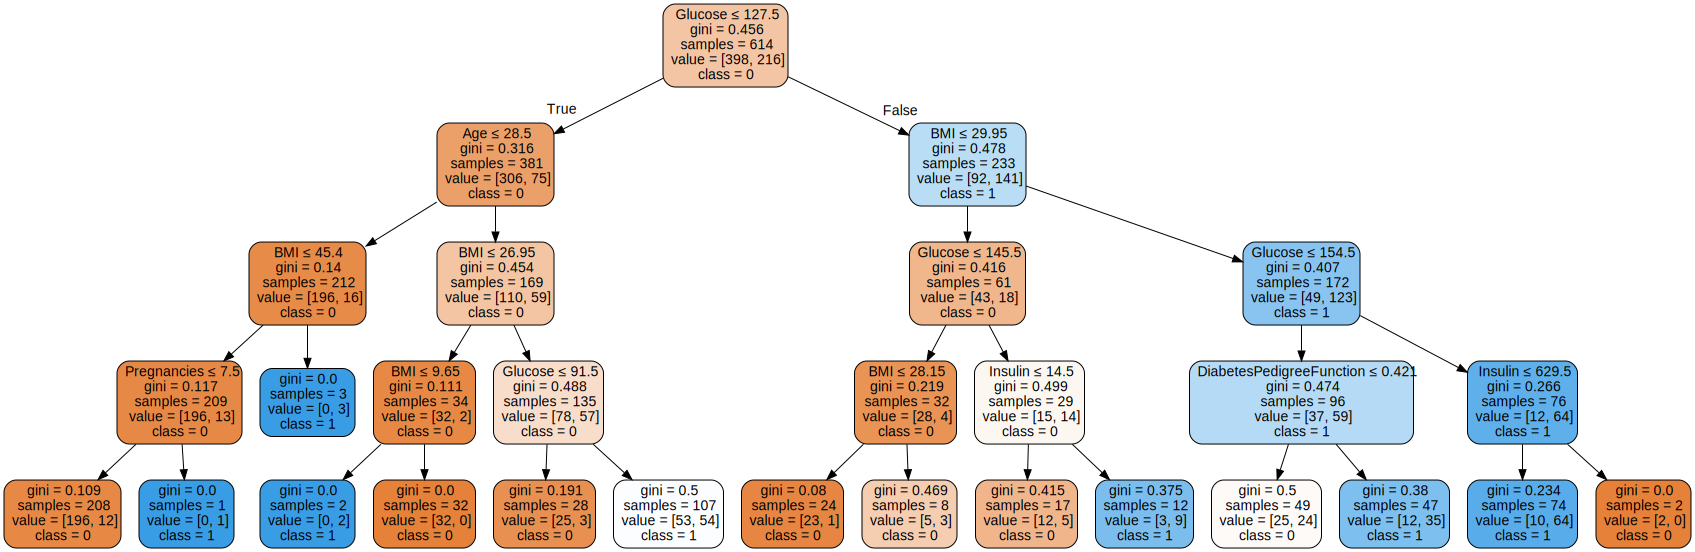

In [35]:
graph